<a href="https://colab.research.google.com/github/sakshyambanjade/Natural-Gas-Price-Analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3954971521.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dates"] = pd.to_datetime(df["Dates"])


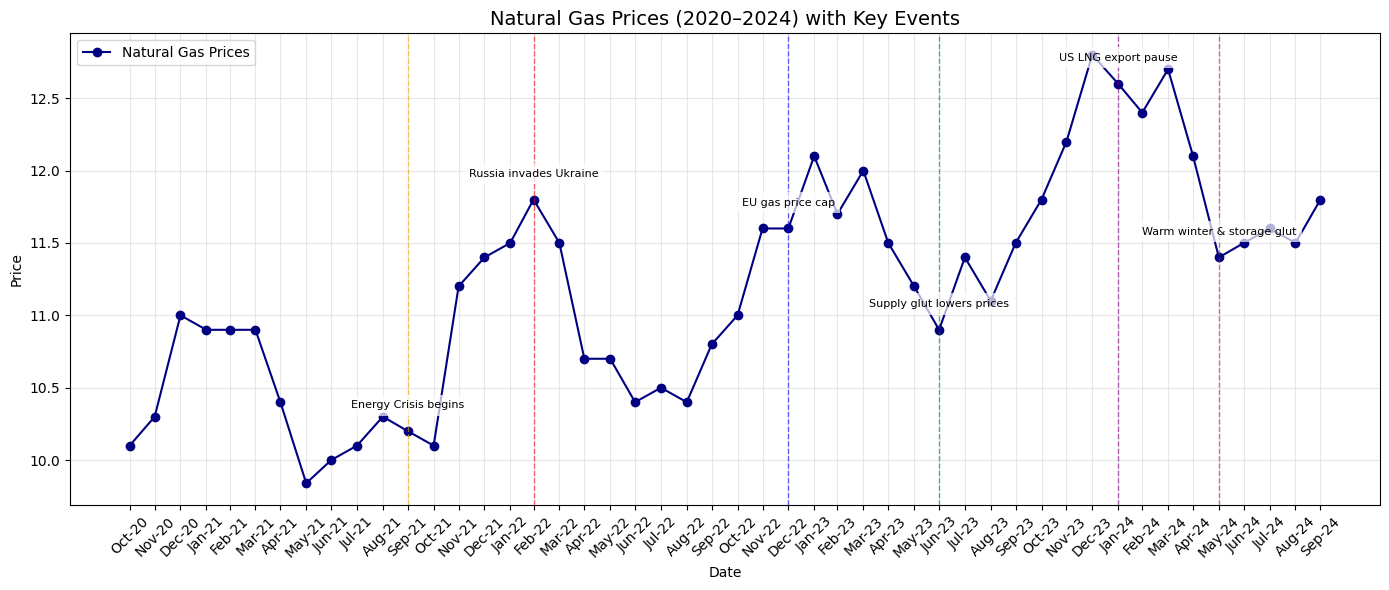

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Loaded the Data
# ------------------------------
data = {
    "Dates": [
        "10/31/20","11/30/20","12/31/20",
        "1/31/21","2/28/21","3/31/21","4/30/21","5/31/21","6/30/21","7/31/21","8/31/21","9/30/21","10/31/21","11/30/21","12/31/21",
        "1/31/22","2/28/22","3/31/22","4/30/22","5/31/22","6/30/22","7/31/22","8/31/22","9/30/22","10/31/22","11/30/22","12/31/22",
        "1/31/23","2/28/23","3/31/23","4/30/23","5/31/23","6/30/23","7/31/23","8/31/23","9/30/23","10/31/23","11/30/23","12/31/23",
        "1/31/24","2/29/24","3/31/24","4/30/24","5/31/24","6/30/24","7/31/24","8/31/24","9/30/24"
    ],
    "Prices": [
        10.1,10.3,11,
        10.9,10.9,10.9,10.4,9.84,10,10.1,10.3,10.2,10.1,11.2,11.4,
        11.5,11.8,11.5,10.7,10.7,10.4,10.5,10.4,10.8,11,11.6,11.6,
        12.1,11.7,12,11.5,11.2,10.9,11.4,11.1,11.5,11.8,12.2,12.8,
        12.6,12.4,12.7,12.1,11.4,11.5,11.6,11.5,11.8
    ]
}

df = pd.DataFrame(data)
df["Dates"] = pd.to_datetime(df["Dates"])

# ------------------------------
# 2. Defined Key Events
# ------------------------------
events = {
    "2021-10-01": ("Energy Crisis begins", "orange"),
    "2022-02-24": ("Russia invades Ukraine", "red"),
    "2022-12-19": ("EU gas price cap", "blue"),
    "2023-07-01": ("Supply glut lowers prices", "green"),
    "2024-01-26": ("US LNG export pause", "purple"),
    "2024-06-01": ("Warm winter & storage glut", "brown"),
}

# ------------------------------
# 3. Ploted Prices + Event Annotations INSIDE BOX
# ------------------------------
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df["Dates"], df["Prices"], marker="o", label="Natural Gas Prices", color="navy")

for date, (event, color) in events.items():
    d = pd.to_datetime(date)
    # find closest price point
    idx = (df["Dates"] - d).abs().argmin()
    d = df.iloc[idx]["Dates"]
    price = df.iloc[idx]["Prices"]

    # vertical line
    ax.axvline(d, color=color, linestyle="--", alpha=0.6, linewidth=1)
    # annotation INSIDE the chart box
    ax.annotate(
        event,
        xy=(d, price),  # anchor at price point
        xytext=(0, 15),  # offset in pixels
        textcoords="offset points",
        rotation=0,
        fontsize=8,
        color="black",
        ha="center",
        va="bottom",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

# Formatting
ax.set_title("Natural Gas Prices (2020–2024) with Key Events", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(alpha=0.3)

# Monthly ticks
ax.set_xticks(df["Dates"])
ax.set_xticklabels(df["Dates"].dt.strftime("%b-%y"), rotation=45)

plt.tight_layout()
plt.show()